<a href="https://colab.research.google.com/github/mahshadmoradi/Machine-Learning/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mahshad Moradi

**Student ID**: 400109373





In [7]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cpu')

# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, input_size, lr=0.01):
        self.lr = lr
        device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # Initialize weights and bias as tensors, with gradients tracking, on the default device (GPU if available)
        self.weights = torch.randn(input_size, requires_grad=True, device=device)
        self.bias = torch.randn(1, requires_grad=True, device=device)

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def loss(self, y_pred, y_true):
        loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
        return loss

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            z = torch.matmul(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute loss
            l = self.loss(y_pred, y)

            # Backward pass
            l.backward()

            # Update weights and bias
            with torch.no_grad():
                self.weights -= self.lr * self.weights.grad
                self.bias -= self.lr * self.bias.grad

            # Zero the gradients
            self.weights.grad.zero_()
            self.bias.grad.zero_()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {l.item()}')

    def predict(self, X):
        z = torch.matmul(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return torch.round(y_pred)  # Returns 0 or 1 based on the threshold of 0.5

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [38]:
# Your code goes here!

# Load dataset
df = pd.read_csv('Logistic_question.csv')

# print(df.head)

# Splitting the dataset into features and target variable
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Convert to binary
y = (y > np.mean(y)).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Normalize the data
scaler = StandardScaler().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert data to PyTorch tensors and move to GPU if available
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

# Assuming input size is the number of features in X_train
input_size = X_train_tensor.shape[1]
model = MyLogisticRegression(input_size)
model.fit(X_train_tensor, y_train_tensor, epochs=1000)

# Making predictions on the test set
y_pred_tensor = model.predict(X_test_tensor)
y_pred = y_pred_tensor.detach().cpu().numpy()  # Detach from computation graph and convert to NumPy array

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 0, Loss: 2.025759220123291
Epoch 100, Loss: 0.6874526739120483
Epoch 200, Loss: 0.45604509115219116
Epoch 300, Loss: 0.39429235458374023
Epoch 400, Loss: 0.36681121587753296
Epoch 500, Loss: 0.3515411913394928
Epoch 600, Loss: 0.34199222922325134
Epoch 700, Loss: 0.33556467294692993
Epoch 800, Loss: 0.3310115933418274
Epoch 900, Loss: 0.32766062021255493

Accuracy: 0.95
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1 Score: 0.9487179487179487


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Accuracy** :
It measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. It's calculated as the number of correct predictions divided by the total number of predictions.

It is useful when the dataset is balanced (i.e., the number of instances in each class is roughly the same). It gives a quick overview of the model's overall performance.

**Precision** :
It is the ratio of true positives to the sum of true and false positives. It indicates the quality of the positive class predictions.

It is useful when the cost of false positives is high. For instance, in email spam detection, a high precision model avoids marking legitimate emails as spam.

**Recall (Sensitivity)** :
It is the ratio of true positives to the sum of true positives and false negatives. It measures the model's ability to detect positive instances.

It is useful when the cost of false negatives is high. In medical diagnostics for a serious disease, it's crucial to identify as many true cases as possible, even if it means tolerating some false positives.

**F1 Score** :
It is the harmonic mean of precision and recall. It balances the trade-off between precision and recall in a single metric.

It is useful when the dataset is imbalanced, or when you want to balance the importance of precision and recall. It's particularly useful when false positives and false negatives have a significant cost.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [39]:
# Your code goes here!

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tensor, y_train_tensor)

# Predict on the test set
y_pred = log_reg.predict(X_test_tensor)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9625
Precision: 0.9736842105263158
Recall: 0.9487179487179487
F1 Score: 0.9610389610389611


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

**Performance** :

  **My function**: The performance of my function largely depends on the optimization and how well the gradient descent algorithm is implemented. Without advanced optimization techniques like mini-batch processing, momentum, or adaptive learning rates, it might converge slower and be less efficient on large datasets.

  **Built-in Function**: Built-in functions are highly optimized and include a variety of solvers that are designed to perform well on different sizes and types of data. They often include parallel processing and are optimized at a lower level for performance.

**Parameters and Their Effects** :

  **My function**: The custom class has limited parameters, mainly focusing on the learning rate and the number of epochs for the gradient descent. These parameters directly affect how quickly the model converges to a solution and how accurately it fits the data without overfitting.

  **Built-in Function**: Built-in logistic regression functions come with a wide range of parameters that influence the model's behavior and performance. Some key parameters include:
  - `penalty`: Specifies the norm used in the penalization (regularization). Regularization helps prevent overfitting by penalizing large coefficients. Options typically include `l1`, `l2`, and sometimes `elasticnet` and `none`.
  - `C`: The inverse of regularization strength; smaller values specify stronger regularization. It balances the trade-off between achieving a low training error and a low testing error (generalization).
  - `solver`: Algorithm to use in the optimization problem. Different solvers are more suitable for certain types of data and models, affecting both performance and accuracy.
  - `max_iter`: Maximum number of iterations taken for the solvers to converge. Similar to the epochs in the custom implementation but often with more sophisticated convergence criteria.

In [40]:
df.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,26.807500,10.741000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,0.606951,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,0.000000,9.200000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,18.000000,10.300000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,27.000000,10.700000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,35.000000,11.200000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,50.000000,12.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import torch

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, input_size, num_classes, lr=0.01):
        self.lr = lr
        self.num_classes = num_classes
        self.weights = torch.randn(input_size, num_classes, requires_grad=True, device=device)
        self.bias = torch.randn(num_classes, requires_grad=True, device=device)

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            scores = torch.matmul(X, self.weights) + self.bias
            loss = torch.nn.functional.cross_entropy(scores, y.long())
            loss.backward()
            with torch.no_grad():
                self.weights -= self.lr * self.weights.grad
                self.bias -= self.lr * self.bias.grad
                self.weights.grad.zero_()
                self.bias.grad.zero_()

    def predict(self, X):
        scores = torch.matmul(X, self.weights) + self.bias
        probabilities = torch.nn.functional.softmax(scores, dim=1)
        return torch.argmax(probabilities, dim=1)


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [55]:
# Your code goes here!

# Load dataset
df = pd.read_csv('Logistic_question.csv')

for i in range(2, 11):  # Loop from 2 to 10 levels of quantization
    # Quantize the target into i bins
    labels = pd.qcut(df['Target'], q=i, labels=False)
    df['QuantizedTarget'] = labels

    # print(df['QuantizedTarget'])
    # print()
    # print(df['Target'])

    # Splitting the dataset into features and target variable
    X = df.drop(['Target', 'QuantizedTarget'], axis=1).values
    y = df['QuantizedTarget'].values

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler().fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.int64, device=device)  # int64 for multinomial classification
    X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32, device=device)

    # Create and train the model
    model = MyMultinomialLogisticRegression(input_size=X_train_tensor.shape[1], num_classes=i)
    model.fit(X_train_tensor, y_train_tensor, epochs=1000)

    # Predict on the test set
    y_pred_tensor = model.predict(X_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Quantization Level: {i}, Accuracy: {accuracy}")


Quantization Level: 2, Accuracy: 0.9375
Quantization Level: 3, Accuracy: 0.875
Quantization Level: 4, Accuracy: 0.5625
Quantization Level: 5, Accuracy: 0.4875
Quantization Level: 6, Accuracy: 0.4
Quantization Level: 7, Accuracy: 0.4
Quantization Level: 8, Accuracy: 0.3625
Quantization Level: 9, Accuracy: 0.375
Quantization Level: 10, Accuracy: 0.2375


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

The model achieves the highest accuracy at the lowest level of quantization (i=2), indicating that, for this particular dataset and model setup, a binary classification framework is the most effective. As the problem becomes more granular with more classes, the model's ability to generalize decreases, likely due to the increased complexity and the limitations of the available features to distinguish between many classes.

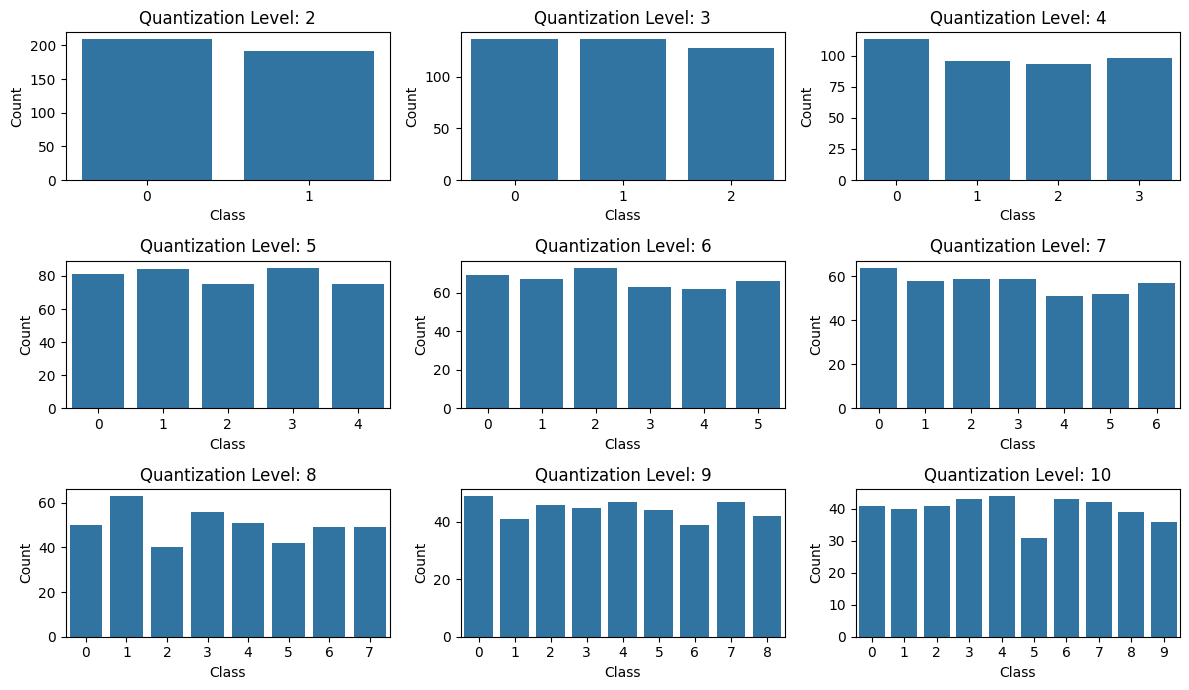

In [59]:
def plot_class_distribution(df, quantization_levels):
    plt.figure(figsize=(12, 7))
    for i, q_level in enumerate(quantization_levels, start=1):
        plt.subplot(3, 3, i)
        labels, bins = pd.qcut(df['Target'], q=q_level, labels=False, retbins=True)
        sns.countplot(x=labels)
        plt.title(f'Quantization Level: {q_level}')
        plt.xlabel('Class')
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_class_distribution(df, range(2, 11))

The populations are nearly the same.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [3]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [43]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/adult-income-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [44]:
# Your code goes here!

import pandas as pd

# Load the dataset
df = pd.read_csv('adult.csv')

print(df.head(10))

# Determine the number of null entries in each column
null_entries = df.isnull().sum()

question_mark_entries = (df == '?').sum()

# Print the number of null entries for each column
print(null_entries)
print()
print(question_mark_entries)

# If you want to know the total number of null entries across the entire dataset
total_null_entries = df.isnull().sum().sum()
total_question_mark_entries = (df == '?').sum().sum()
print(f"\nTotal null entries in the dataset: {total_null_entries}")
print(f"\nTotal ? entries in the dataset: {total_question_mark_entries}")

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

- Deletion of Rows or Columns:

Method: Remove rows with missing values or entire columns if a substantial portion of the data is missing.

When to Use: This method is appropriate when the dataset is large enough to retain its integrity even after removing missing data. It's also suitable when the proportion of missing data is small or if the missing data is not random (i.e., if there's a pattern to the missing data that makes certain rows or columns less reliable).

- Imputation with Statistics (Mean, Median, Mode):

Method: Replace missing values with a central tendency measure of the respective column (numerical data: mean or median; categorical data: mode).

When to Use: Effective for numerical datasets with random missing values and without significant outliers. It is quick and improves dataset usability without deleting any data. However, it can lead to biased estimates if the missing data is not random.

- Predictive Imputation:

Method: Use other complete variables in the dataset to build a regression model to predict the missing values.

When to Use: Suitable when the missing values are systematically related to other variables. It’s more precise than simple statistical imputation and useful when high data integrity is necessary. This method assumes that the relationships in the data can predict missing values accurately.

- K-Nearest Neighbors (KNN) Imputation:

Method: Replace missing data by finding the ‘k’ closest neighbors to the observation with missing data and then impute using the mean or median of these neighbors.

When to Use: Best used when data points with similar characteristics also have similar target values. It’s particularly good for datasets where patterns or groups are evident. The choice of 'k' and the distance metric significantly influence the imputation quality.

- Using Algorithms that Support Missing Values:

Method: Utilize machine learning algorithms that can handle missing values natively, such as XGBoost or LightGBM.

When to Use: This approach is useful when predictive accuracy is more important than interpretability of the missing data handling process. It saves the preprocessing step and can handle various patterns of missing data effectively.


**Task:** Handle null entries using your best method.

I used Deletion of Rows or Columns since as shown below it only reduces a small amount of null data

In [45]:
# Your code goes here!

print(df.shape)

df.replace(to_replace="?", value=np.nan, inplace=True)
df.dropna(inplace=True)

print(df.shape)

(48842, 15)
(45222, 15)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Apply Label Encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame
print(df.head(5))

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame after encoding
# Selecting features and target
X = df.drop('income', axis=1)  # Assuming 'income' is the target variable
y = df['income']

# Splitting the dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data only
X_train = scaler.fit_transform(X_train)

# Apply same transformation to test data
X_test = scaler.transform(X_test)

In [48]:
# Setting up the logistic regression model and parameters for GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Solvers
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the outcomes
print("Best Model Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Model Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Training Accuracy: 0.820631893191807
Test Accuracy: 0.8208955223880597


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [40]:
# Dividing the training set into ten segments
number_of_splits = 10
partitions_X_train = np.array_split(X_train, number_of_splits)
partitions_y_train = [np.array(part) for part in np.array_split(y_train, number_of_splits)]

# Constructing the Logistic Regression class
class LogisticModel(nn.Module):
    def __init__(self, dimensions):
        super(LogisticModel, self).__init__()
        self.linear_layer = nn.Linear(dimensions, 1)
        self.activation_function = nn.Sigmoid()

    def forward(self, input_data):
        linear_output = self.linear_layer(input_data)
        activated_output = self.activation_function(linear_output)
        return activated_output

# Initiating and training multiple Logistic Regression instances
ensemble_models = []
for index in range(number_of_splits):
    log_reg_model = LogisticModel(X_train.shape[1])
    loss_function = nn.BCELoss()
    sgd_optimizer = optim.SGD(log_reg_model.parameters(), lr=0.01)

    training_tensor_X = torch.tensor(partitions_X_train[index], dtype=torch.float32)
    training_tensor_y = torch.tensor(partitions_y_train[index], dtype=torch.float32)

    epochs = 1000
    for epoch in range(epochs):
        sgd_optimizer.zero_grad()
        model_outputs = log_reg_model(training_tensor_X)
        error = loss_function(model_outputs.squeeze(), training_tensor_y)
        error.backward()
        sgd_optimizer.step()

    ensemble_models.append(log_reg_model)

# Ensemble methods definitions
def vote_ensemble(models, X_test_data):
    test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
    model_outputs = []
    for each_model in models:
        each_model.eval()
        with torch.no_grad():
            output = each_model(test_tensor)
            predictions = (output.squeeze() > 0.5).float()
            model_outputs.append(predictions)

    final_vote = torch.mode(torch.stack(model_outputs), dim=0).values
    return final_vote

def average_ensemble(models, X_test_data):
    test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
    model_outputs = []
    for each_model in models:
        each_model.eval()
        with torch.no_grad():
            output = each_model(test_tensor)
            model_outputs.append(output.squeeze())

    mean_probabilities = torch.mean(torch.stack(model_outputs), dim=0)
    final_predictions = (mean_probabilities > 0.5).float()
    return final_predictions

def weighted_average_ensemble(models, X_test_data):
    test_tensor = torch.tensor(X_test_data, dtype=torch.float32)
    model_outputs = []
    weights = [1 / (i + 1) for i in range(len(models))]
    weight_tensor = torch.tensor(weights, dtype=torch.float32)
    for each_model in models:
        each_model.eval()
        with torch.no_grad():
            output = each_model(test_tensor)
            model_outputs.append(output.squeeze())

    weighted_sum = torch.sum(torch.stack(model_outputs) * weight_tensor.view(-1, 1), dim=0) / torch.sum(weight_tensor)
    final_predictions = (weighted_sum > 0.5).float()
    return final_predictions

# Evaluating the ensemble models
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

print("Majority Vote Ensemble:")
majority_accuracy = (vote_ensemble(ensemble_models, X_test) == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {majority_accuracy}")

print("Average Probability Ensemble:")
average_accuracy = (average_ensemble(ensemble_models, X_test) == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {average_accuracy}")

print("Weighted Average Ensemble:")
weighted_accuracy = (weighted_average_ensemble(ensemble_models, X_test) == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {weighted_accuracy}")


Majority Vote Ensemble:
Test Accuracy: 0.8148148148148148
Average Probability Ensemble:
Test Accuracy: 0.8144831398562742
Weighted Average Ensemble:
Test Accuracy: 0.8134881149806523


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

- **Majority Vote Ensemble:**

**Approach:** This method aggregates each model's predictions, choosing the class with the majority of votes as the final decision.

**Justification:** This straightforward technique minimizes prediction errors by capitalizing on the consensus among various models, making it highly effective for robust classification tasks.

- **Average Probability Ensemble:**

**Approach:** Calculates the average probabilities from all models for each class, selecting the class with the highest average as the prediction.

**Justification:** By averaging model outputs, this method smooths out extremes in individual model predictions, providing a balanced outcome that reflects the collective confidence of the models.

- **Weighted Average Ensemble:**

**Approach:** Similar to the average probability approach but incorporates weights for each model based on their performance, enhancing the influence of more accurate models.

**Justification:** This method optimizes the ensemble’s effectiveness by emphasizing reliable models, leading to a more accurate and dependable ensemble prediction.




- The majority vote gave the best result here.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Optimal model achieved with 80 partitions
Train Accuracy: 0.740581032147497
Test Accuracy: 0.7458264234383637


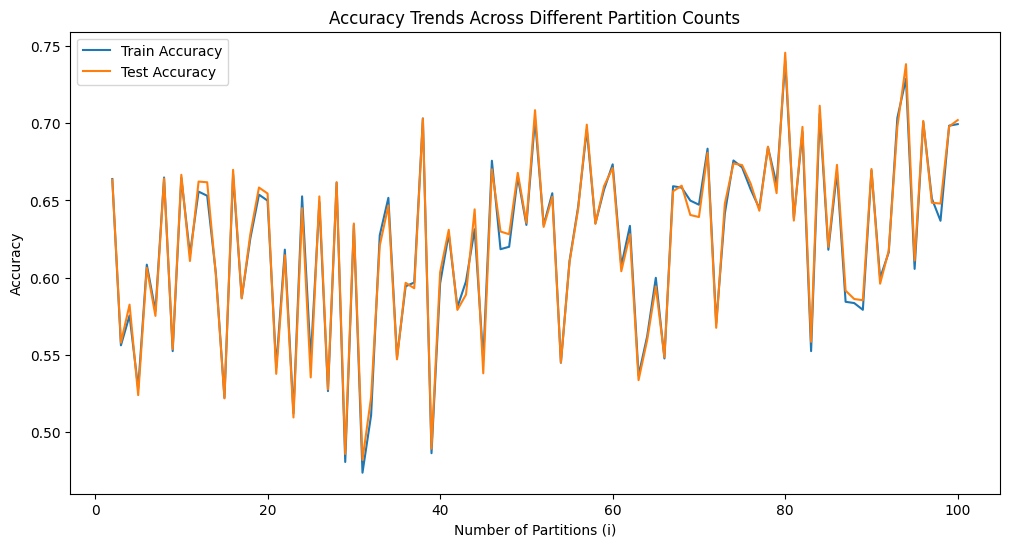

In [61]:
import matplotlib.pyplot as plt

class LogisticModel(nn.Module):
    def __init__(self, dimension):
        super(LogisticModel, self).__init__()
        self.linear_module = nn.Linear(dimension, 1)
        self.activation = nn.Sigmoid()

    def forward(self, input_tensor):
        linear_output = self.linear_module(input_tensor)
        activated_output = self.activation(linear_output)
        return activated_output

# Assess models over varying numbers of data partitions
training_accuracy_list = []
testing_accuracy_list = []
optimal_partition_count = 0
highest_train_accuracy = 0
highest_test_accuracy = 0

for partition_count in range(2, 101):
    # Divide the training data into partition_count segments
    partitioned_X_train = np.array_split(X_train, partition_count)
    partitioned_y_train = np.array_split(np.array(y_train), partition_count)

    # Initialize and train partition_count logistic regression models
    trained_models = []
    for partition_index in range(partition_count):
        log_reg_model = LogisticModel(X_train.shape[1])
        loss_criterion = nn.BCELoss()
        training_optimizer = optim.SGD(log_reg_model.parameters(), lr=0.01)

        current_X_train = torch.tensor(partitioned_X_train[partition_index], dtype=torch.float32)
        current_y_train = torch.tensor(partitioned_y_train[partition_index], dtype=torch.float32)

        epochs = 10
        for epoch in range(epochs):
            training_optimizer.zero_grad()
            model_output = log_reg_model(current_X_train)
            error = loss_criterion(model_output.squeeze(), current_y_train)
            error.backward()
            training_optimizer.step()

        trained_models.append(log_reg_model)

    # Evaluate using Majority Vote Ensemble for both training and testing data
    train_data_tensor = torch.tensor(np.array(y_train), dtype=torch.float32)
    test_data_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)
    train_predictions = vote_ensemble(trained_models, X_train)
    test_predictions = vote_ensemble(trained_models, X_test)
    train_accuracy = (train_predictions == train_data_tensor).sum().item() / len(y_train)
    test_accuracy = (test_predictions == test_data_tensor).sum().item() / len(y_test)

    training_accuracy_list.append(train_accuracy)
    testing_accuracy_list.append(test_accuracy)

    # Update best model metrics if current model is better
    if test_accuracy > highest_test_accuracy:
        optimal_partition_count = partition_count
        highest_train_accuracy = train_accuracy
        highest_test_accuracy = test_accuracy

print(f"Optimal model achieved with {optimal_partition_count} partitions")
print(f"Train Accuracy: {highest_train_accuracy}")
print(f"Test Accuracy: {highest_test_accuracy}")

# Visualize the relationship between partition count and accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(2, 101), training_accuracy_list, label='Train Accuracy')
plt.plot(range(2, 101), testing_accuracy_list, label='Test Accuracy')
plt.xlabel('Number of Partitions (i)')
plt.ylabel('Accuracy')
plt.title('Accuracy Trends Across Different Partition Counts')
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**

Summary of Model Training Results of Logistic Regression models with varying numbers of parts and using the Majority Vote Ensemble method:

The highest performing model was obtained with i = 80 partitions, achieving training and testing accuracies of approximately 74.06% and 74.58%, respectively.
Both training and testing accuracies showed a general upward trend as the number of partitions increased from 2 to 100.
